In [1]:
# pandas is a fast, powerful, flexible and easy to use open source [data analysis and manipulation tool].
# Built on NumPy.
import pandas as pd
# NumPy is used to perform a wide variety of mathematical operations on arrays.
import numpy as np
# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
# Missingno is used for graphical analysis of missing values.
import missingno as msno
# SimpleImputer is univariate imputer for completing missing values with simple strategies.
from sklearn.impute import SimpleImputer 
# LinearRegression fits a linear model.
from sklearn.linear_model import LinearRegression
# Sklearn. metrics module implements several loss, score, and utility functions to measure classification performance.
from sklearn import metrics

## Import of Athlete Events Data

In [2]:
file = "E:\\SQL Data Analysis\\Athlete Events\\Data\\athlete_events.csv"
athlete_events = pd.read_csv(file)

In [3]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
athlete_events.shape

(271116, 15)

**Data Type Constraints**

15 columns: 5 Quantitative - 10 Qualitative

In [5]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Age, Height, and Weight columns have no float values so I'll change their type to integer after **Missingness Analysis** because I can't change their type before treat the nulls.

**Columns Needed and Not Needed**

I'll remove ID column because it has no importance and we can rely on the Name column.

In [7]:
# Droping ID column
athlete_events.drop('ID', axis = 1, inplace = True)

**Uniqueness Constraints (Duplications)**

In this dataset there is no importance to duplications, so I'll remove them.

In [8]:
# Total duplications
athlete_events.duplicated().sum()

1385

In [9]:
# Droping duplications
athlete_events.drop_duplicates(inplace = True)

## Consistency

In [10]:
athlete_events.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


At fourth row, the NOC is `DEN` and at Team is `Denmark/Sweden`... it should be `Denmark` so I'll fix that.

In [11]:
noc_regions = pd.read_csv('noc_regions.csv')
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [12]:
# Droping notes column
noc_regions.drop('notes', axis = 1, inplace = True)

In [13]:
# Joining two dataframe by 
athlete_events = athlete_events.merge(noc_regions, on='NOC', how='left')
athlete_events.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [14]:
# Copy columns names
print(athlete_events.columns.to_list())

['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region']


In [15]:
# Droping Team column
athlete_events.drop('Team', axis = 1, inplace = True)
# Rename region to Team
athlete_events.rename(columns = {'region':'Team'}, inplace = True)
# Reorder the columns
athlete_events = athlete_events.reindex(columns=['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

In [16]:
athlete_events.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Missingness Analysis

**Analyzing Missingness Numerically**

In [17]:
# Total missing values
athlete_events.isnull().sum()

Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229971
dtype: int64

In [18]:
# Percentage of missingness
athlete_events.isnull().mean() * 100

Name       0.000000
Sex        0.000000
Age        3.453287
Height    21.803717
Weight    22.809489
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.255595
dtype: float64

Age has small missingness unlike Medal, but in Medal it logical because there is a lot of players not won medals.  
Height and Weight have a close percentage.

Lets see full story!!

**Analyzing Missingness Graphically**

<AxesSubplot:>

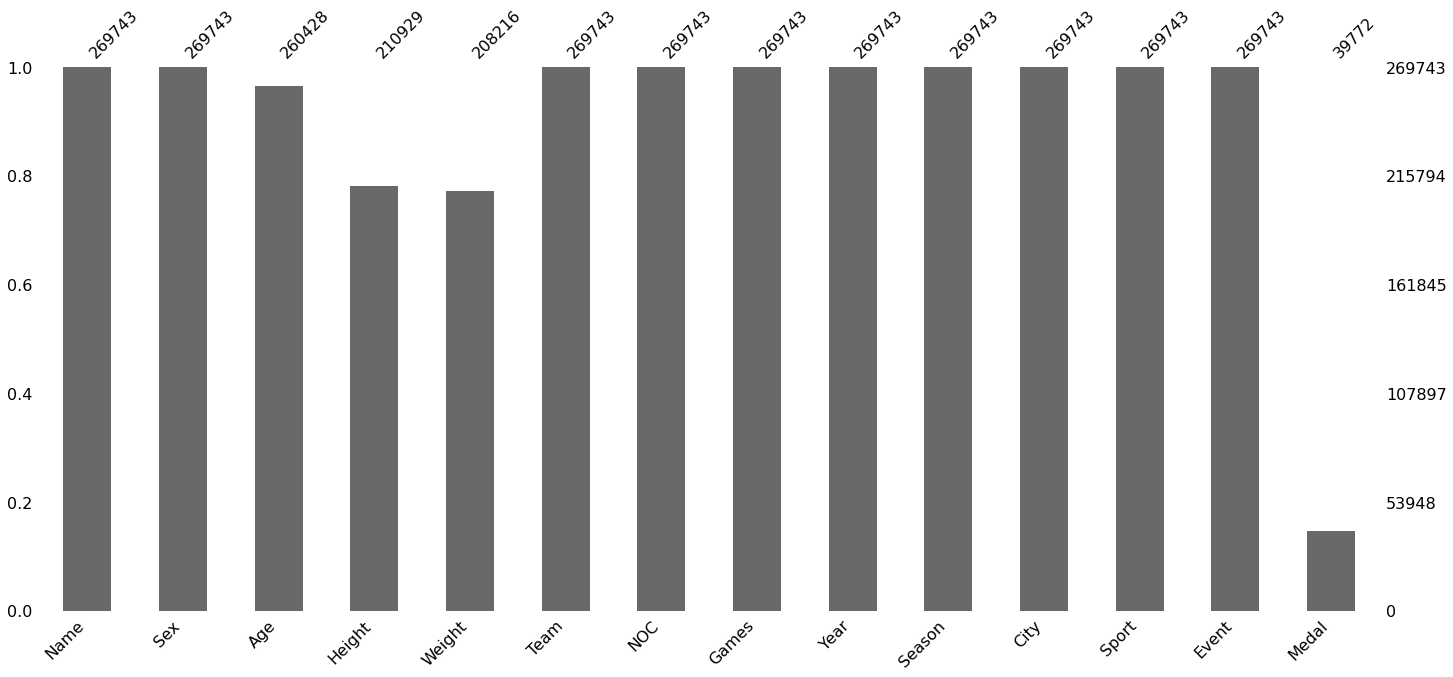

In [19]:
# showing the amoant of present data in each column and without the missingness
msno.bar(athlete_events)

<AxesSubplot:>

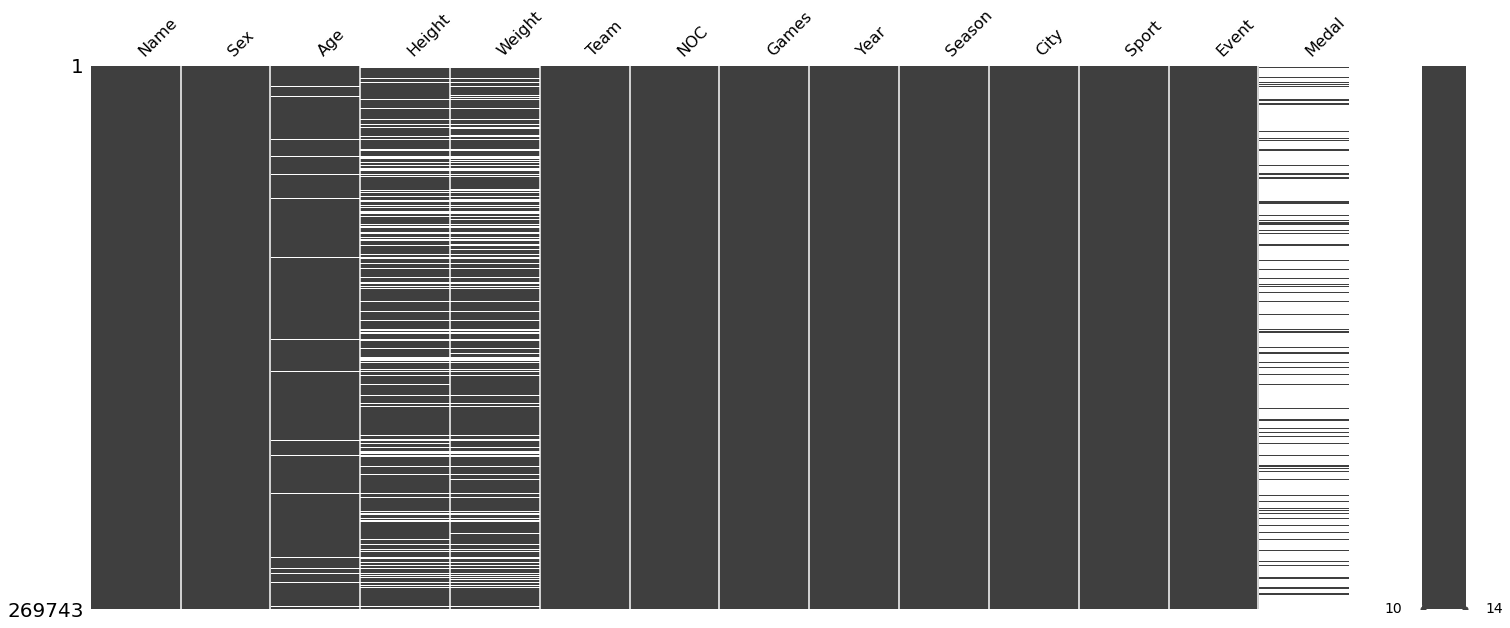

In [20]:
# Showing the distribution of missingness in each column
msno.matrix(athlete_events)

<AxesSubplot:>

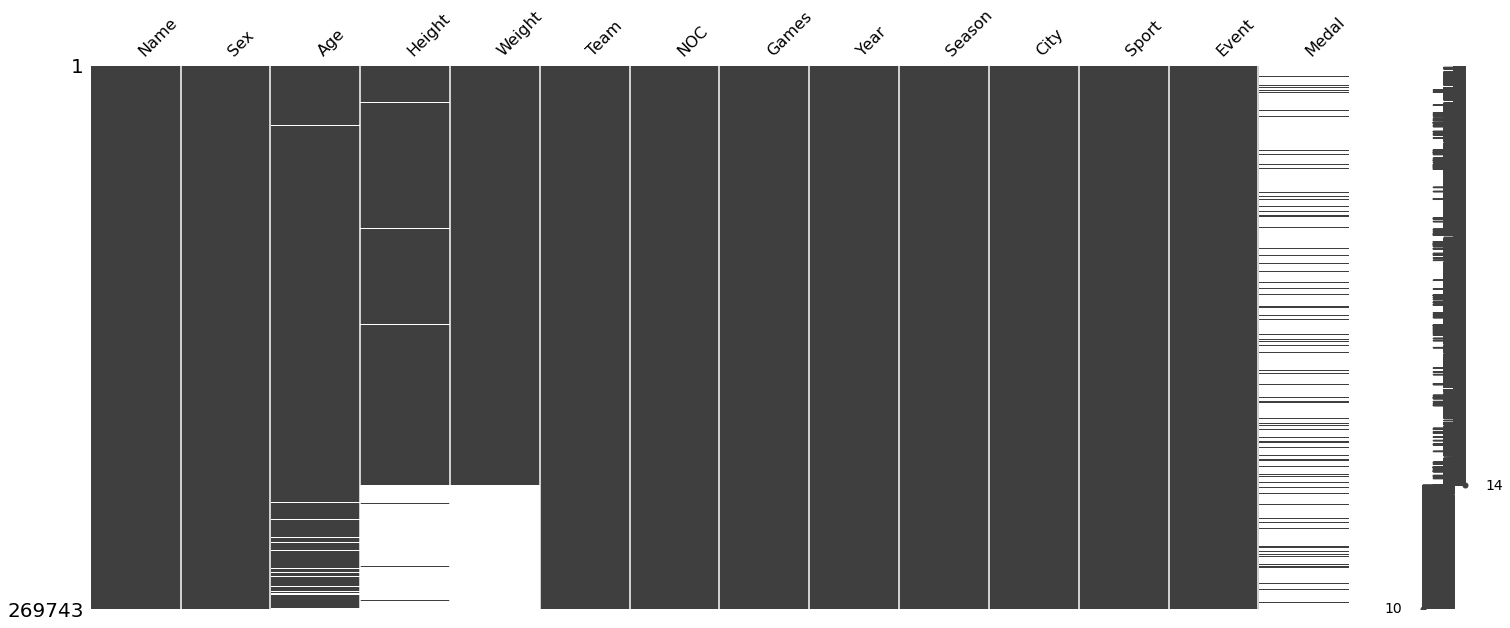

In [21]:
msno.matrix(athlete_events.sort_values('Weight'))

**Exploring relationships between the missingness**

<AxesSubplot:>

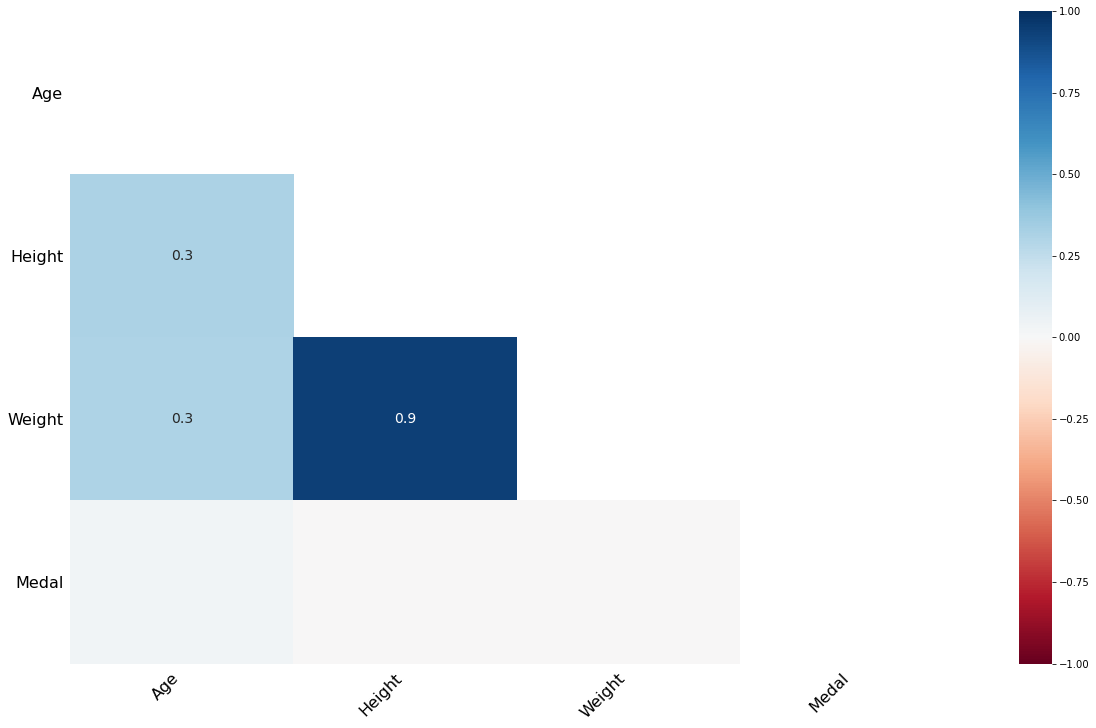

In [22]:
# Graph of correlation of missing values between columns
msno.heatmap(athlete_events)

**Conclusion**
- There is a relationship between the missingness in each of **Height** and **Weight** = Missing not at Random (MNAR)
- Missingness has no relationship between any values in **Medal** = Missing Completely at Random (MCAR)
- All missingness in **Age** column it is met a missing value in each of **Height** and **Weight** = Missing at Random (MAR)

### Imputing `Medal` column

There is a lot of players didn't win a medal in this athlete event! so I'll fill the missingness with **No**

In [23]:
athlete_events['Medal'].fillna('No', inplace = True)

### Imputing `Age` column

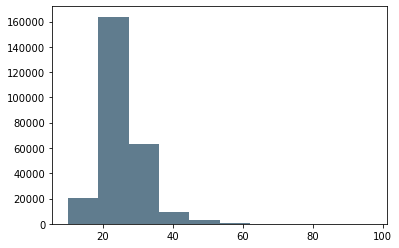

In [24]:
plt.hist(athlete_events['Age'], color='#607c8e')
plt.show()

The shape is a right-skewed so I think imputing the column with most frequent value will not affect on our analysis, Especially it contains a small number of the missingness (about 3% of the values).

In [25]:
# Imputing with the mode Using sklearn.impute
# creating the model with most frequent value
mode_imputer = SimpleImputer(strategy='most_frequent')
# Fit the model
athlete_events['Age'] = mode_imputer.fit_transform(athlete_events['Age'].values.reshape(-1,1))

### Imputing `Weight` and `Height` column

**Creating a tables with different assumptions** between the two variables

In [26]:
# When Weight and height not include nulls
# I'll use this table to create the model
no_null = athlete_events[~athlete_events['Weight'].isnull() & ~athlete_events['Height'].isnull()]
len(no_null)

206852

In [27]:
# When Weight is null and height is not
# I'll use this table to predict Weight column
w_is_null = athlete_events[athlete_events['Weight'].isnull() & ~athlete_events['Height'].isnull()]
len(w_is_null)

4077

In [28]:
# When height is null and Weight is not
# I'll use this table to predict Height column
h_is_null = athlete_events[~athlete_events['Weight'].isnull() & athlete_events['Height'].isnull()]
len(h_is_null)

1364

In [29]:
# When Weight and height are both nulls
w_h_are_null = athlete_events[athlete_events['Weight'].isnull() & athlete_events['Height'].isnull()]
len(w_h_are_null)

57450

**Exploring the relationship**

When Weight and height not include nulls

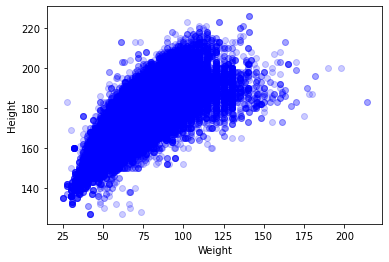

In [30]:
plt.scatter(no_null['Weight'], no_null['Height'], color='b', alpha=0.2)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [31]:
# Get the linear correlation
w_h = no_null[['Weight', 'Height']]
w_h.corr().iloc[0,1]

0.796230669287634

Positive strong linear correlation (~0.8): Taller people are heavier, we can predict values!

**Using Linear Regression to predict the missingness**

In [32]:
# Weight as an independent variable
x = no_null['Weight'].values.reshape(-1, 1)
# Height as a dependent variable
response = no_null['Height'].values

In [33]:
# Create the model
reg = LinearRegression()
# Fit the model to the data
reg.fit(x, response)
# Make predictions
predictions = reg.predict(x)

In [34]:
reg.intercept_, reg.coef_

(133.96262352304782, array([0.58571101]))

In [35]:
predictions[:10], response[:10]

(array([180.81950465, 169.10528437, 181.99092668, 181.99092668,
        181.99092668, 181.99092668, 181.99092668, 181.99092668,
        177.89094958, 177.89094958]),
 array([180., 170., 185., 185., 185., 185., 185., 185., 188., 188.]))

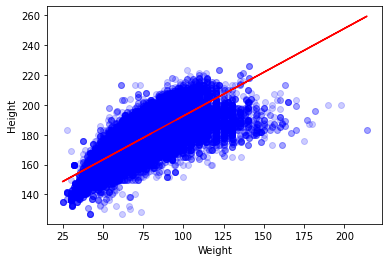

In [36]:
# Ploting with the linear model
plt.scatter(no_null['Weight'], no_null['Height'], color='b', alpha=0.2)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.plot(x, predictions, color='r')
plt.show()

`R-squared` not high as I need but it fit for purpose

In [37]:
metrics.r2_score(response, predictions)

0.6339832787142616

**Predict messing values of `Height`**

Using above model to predict Height nulls by input the Weight values

In [38]:
# When height is null and Weight is not
h_is_null.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
134,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,No
238,Hosni Mohamed Abbas,M,28.0,NaN,60.0,Syria,UAR,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Featherweight,No
239,Hosni Mohamed Abbas,M,32.0,NaN,60.0,Egypt,EGY,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Featherweight,No
354,Mohamed Ali Abdel Kerim,M,24.0,NaN,81.0,Egypt,EGY,1952 Summer,1952,Summer,Helsinki,Weightlifting,Weightlifting Men's Light-Heavyweight,No
355,Mohamed Ali Abdel Kerim,M,32.0,NaN,81.0,Syria,UAR,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Light-Heavyweight,No


In [39]:
# Weight values as an input to prdeict the height
x_input = h_is_null['Weight'].values.reshape(-1, 1)
# Predict the height
height_ = reg.predict(x_input)

In [40]:
# Imputing with the predictions to the nearest integer
athlete_events.loc[~athlete_events['Weight'].isnull() & athlete_events['Height'].isnull(), 'Height'] = np.rint(height_)

**Predict messing values of `Weight`**

Creating new model: to predict Weight nulls by input the Height values

In [41]:
# Height as an independent variable
response = no_null['Weight'].values
# Weight as a dependent variable
x = no_null['Height'].values.reshape(-1, 1)

# Create the model
reg = LinearRegression()
# Fit the model to the data
reg.fit(x, response)
# Make predictions
predictions = reg.predict(x)

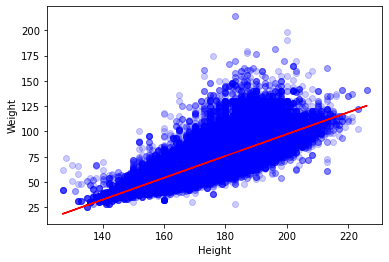

In [42]:
# Ploting with the linear model
plt.scatter(no_null['Height'], no_null['Weight'], color='b', alpha=0.2)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.plot(x, predictions, color='r')
plt.show()

In [43]:
# R-squared
metrics.r2_score(response, predictions)

0.6339832787142616

In [44]:
# When Weight is null and height is not
w_is_null.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No
27,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,No
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
595,Abdullah Abdulrahman Zeyab,M,16.0,177.0,NaN,Kuwait,KUW,1972 Summer,1972,Summer,Munich,Swimming,Swimming Men's 100 metres Freestyle,No
982,John Charles Abrams,M,22.0,183.0,NaN,New Zealand,NZL,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,No


In [45]:
# Height values as an input to prdeict the weight
x_input = w_is_null['Height'].values.reshape(-1, 1)
# Predict the Weight
weight_ = reg.predict(x_input)

In [46]:
# Imputing with the predictions to the nearest integer
athlete_events.loc[athlete_events['Weight'].isnull() & ~athlete_events['Height'].isnull(), 'Weight'] = np.rint(weight_)

**Next Step**

I'll fill the missingness with the mean depending on each `sport`

<AxesSubplot:>

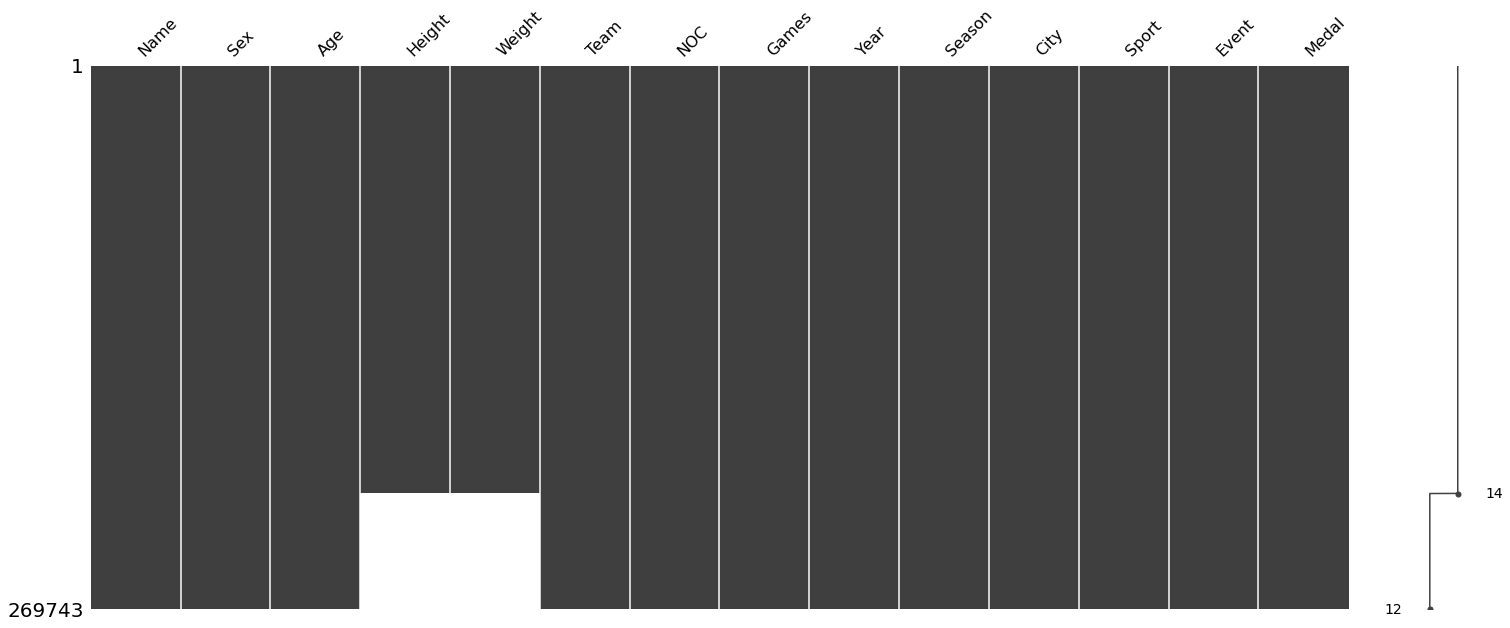

In [47]:
msno.matrix(athlete_events.sort_values('Weight'))

In [48]:
# Example: getting the mean height for Basketball players
np.rint(athlete_events[athlete_events['Sport'] == 'Basketball']['Height'].mean())

191.0

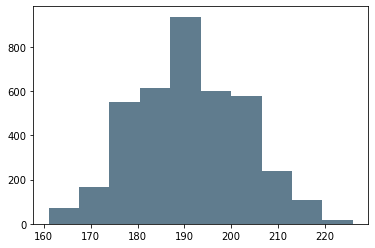

In [49]:
plt.hist(athlete_events[athlete_events['Sport'] == 'Basketball']['Height'], color='#607c8e')
plt.show()

It's a bell-shaped so I will imputing the missingness with the mean

In [50]:
# Filling the missingnes with the mean depending on each sport to the nearest integer
sport_mean = athlete_events.groupby('Sport').transform('mean')
athlete_events.fillna(np.rint(sport_mean), inplace = True)

In [51]:
# Let's check.. 
athlete_events.isnull().sum()

Name       0
Sex        0
Age        0
Height    99
Weight    99
Team       0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
dtype: int64

In [52]:
# Imputing with the mean Using sklearn.impute
# creating the model with mean value
mean_imputer = SimpleImputer(strategy='mean')
# Fit the model 'Height' 
athlete_events['Height'] = mode_imputer.fit_transform(athlete_events['Height'].values.reshape(-1,1))
# Fit the model 'Weight' 
athlete_events['Weight'] = mode_imputer.fit_transform(athlete_events['Weight'].values.reshape(-1,1))

## Saving cleaned dataset

In [54]:
# As I mentioned above at 'Data Type Constraints' section, I'll change the type of the three columns after Missingness Analysis.
athlete_events = athlete_events.astype({'Age':'int64', 'Height':'int64', 'Weight':'int64'})

In [55]:
# Let's check..
athlete_events.dtypes

Name      object
Sex       object
Age        int64
Height     int64
Weight     int64
Team      object
NOC       object
Games     object
Year       int64
Season    object
City      object
Sport     object
Event     object
Medal     object
dtype: object

In [56]:
athlete_events.to_csv('athlete_events_cleaned.csv', index=False)